# Testing out different Classifiers

    1. Random Forest
    2. XGBoost
    3. SVM
    4. Multinomial Naïve Bayes


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from comet_ml import Experiment
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from xgboost import XGBRegressor, XGBClassifier

In [2]:
train_df = pd.read_csv('../data/tweets_50_shuffled_train.csv')
test_df = pd.read_csv('../data/tweets_50_shuffled_test.csv')
X_train = train_df['text_tokenized']
y_train = train_df['label']
X_test = test_df['text_tokenized']
y_test = test_df['label']

vect = TfidfVectorizer(strip_accents='ascii', max_features=30_000, stop_words='english')
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

clfs = [
            DummyClassifier(),
            DummyClassifier(strategy='uniform', random_state=0),
            DummyClassifier(strategy='stratified', random_state=0),
            LogisticRegression(multi_class='multinomial', solver='newton-cg'),
            LinearSVC(),
            RandomForestClassifier(),
            MultinomialNB(),
            XGBClassifier(),
    ]

for clf in clfs:
    clf.fit(X_train_vect, y_train)
    y_pred = clf.predict(X_test_vect)
    print(clf)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


DummyClassifier()
0.5610961365678346
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       611
           1       0.56      1.00      0.72      1249
           2       0.00      0.00      0.00       366

    accuracy                           0.56      2226
   macro avg       0.19      0.33      0.24      2226
weighted avg       0.31      0.56      0.40      2226

DummyClassifier(random_state=0, strategy='uniform')
0.3306379155435759
              precision    recall  f1-score   support

           0       0.27      0.33      0.30       611
           1       0.55      0.33      0.41      1249
           2       0.16      0.32      0.21       366

    accuracy                           0.33      2226
   macro avg       0.33      0.33      0.31      2226
weighted avg       0.41      0.33      0.35      2226

DummyClassifier(random_state=0, strategy='stratified')
0.3683737646001797
              precision    recall  f1-score   support

 

/Users/henrystoll/SDK/anaconda3/envs/p-nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/henrystoll/SDK/anaconda3/envs/p-nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/henrystoll/SDK/anaconda3/envs/p-nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

LogisticRegression(multi_class='multinomial', solver='newton-cg')
0.5965858041329739
              precision    recall  f1-score   support

           0       0.46      0.56      0.50       611
           1       0.70      0.68      0.69      1249
           2       0.54      0.38      0.44       366

    accuracy                           0.60      2226
   macro avg       0.56      0.54      0.54      2226
weighted avg       0.60      0.60      0.60      2226

LinearSVC()
0.610062893081761
              precision    recall  f1-score   support

           0       0.48      0.63      0.55       611
           1       0.73      0.65      0.69      1249
           2       0.52      0.44      0.48       366

    accuracy                           0.61      2226
   macro avg       0.58      0.57      0.57      2226
weighted avg       0.63      0.61      0.61      2226

RandomForestClassifier()
0.5624438454627134
              precision    recall  f1-score   support

           0       0.36 

/Users/henrystoll/SDK/anaconda3/envs/p-nlp/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:58:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.6073674752920036
              precision    recall  f1-score   support

           0   

1407

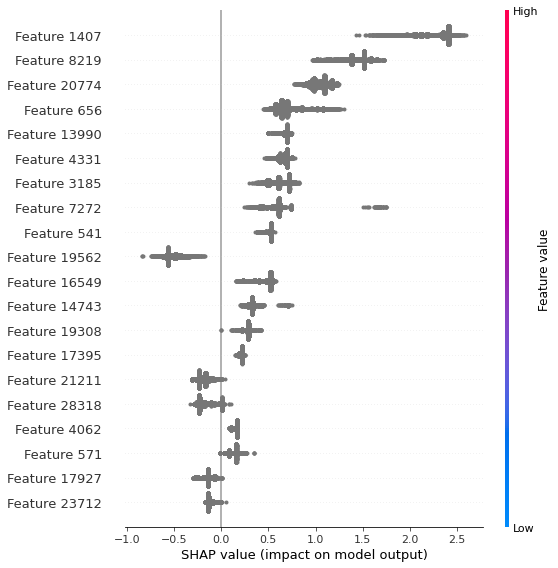

In [75]:
import shap  # package used to calculate Shap values
#
# # Create object that can calculate shap values
explainer = shap.TreeExplainer(clfs[-1])
#
# # calculate shap values. This is what we will plot.
# # Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
# shap_values = explainer.shap_values(X_test_vect.toarray())
shap_values = explainer.shap_values(X_train_vect.toarray())

s_values = np.asarray(shap_values)
s_values[0][0].argmax()

# # Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[0], X_train_vect)
# shap.plots.bar(shap_values[:,:,"joy"].mean(0))

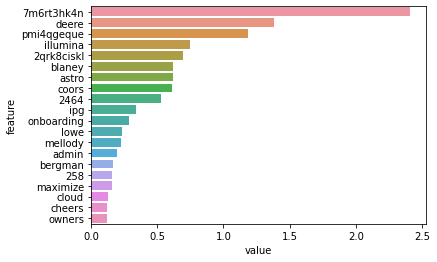

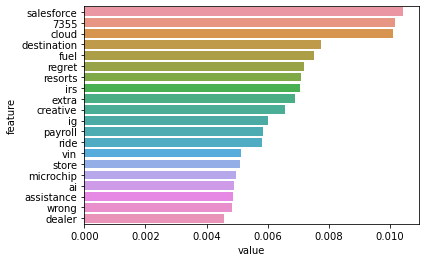

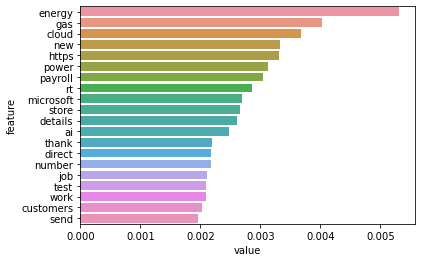

In [80]:
xgb = clfs[-1]
rfc = clfs[-3]
def top_feature_importance(feature_importances):
    zipped = zip(vect.get_feature_names(), feature_importances)
    feature_importance = pd.DataFrame(zipped, columns=["feature", "value"])
    feature_importance = feature_importance.sort_values('value', ascending=False)
#
    sns.barplot(data=feature_importance[:20], y='feature', x='value')
    plt.show()

top_feature_importance(s_values[0][0])
top_feature_importance(xgb.feature_importances_)
top_feature_importance(rfc.feature_importances_)
# results_cv.sort_values('rank_test_score')
# # print(results_cv.T.to_markdown())
# mean_test_cols = results_cv.columns[results_cv.columns.map(lambda s: s.startswith('mean_test_'))]
# print(results_cv[['param_vect', *mean_test_cols]].T.to_markdown())

In [ ]:
# perm_importance = permutation_importance(xgb, X_test_vect.toarray(), y_test)
# sorted_idx = perm_importance.importances_mean.argsort()
# sorted_idx
# plt.barh(df.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

In [ ]:
# df_label0 = pd.DataFrame(common_words_unigrams[0], columns = ['TwitterText' , 'Frequency'])
# df_label1 = pd.DataFrame(common_words_unigrams[1], columns = ['TwitterText' , 'Frequency'])
# df_label2 = pd.DataFrame(common_words_unigrams[2], columns = ['TwitterText' , 'Frequency'])
# fig, ax = plt.subplots(figsize=(30, 30),nrows=3, ncols=1)
# seaborn_plt_label0=sns.barplot(ax=ax[0], x='TwitterText', y='Frequency', data=df_label0.reset_index()).set_title('Unigram ESG Score High',size=30)
# seaborn_plt_label1=sns.barplot(ax=ax[1], x='TwitterText', y='Frequency', data=df_label1.reset_index()).set_title('Unigram ESG Score Medium',size=30)
# seaborn_plt_label2=sns.barplot(ax=ax[2], x='TwitterText', y='Frequency', data=df_label2.reset_index()).set_title('Unigram ESG Score Low',size=30)
# ax = ax.flatten()
# for i in ax:
#     i.tick_params(labelrotation=45)
#     i.tick_params(axis='x', labelsize=30)
#     i.tick_params(axis='y', labelsize=30)
#     i.set_xlabel('Words',size=30)
#     i.set_ylabel('Frequency',size=30)